# `NumPy`: матрицы и операции над ними
---

В этом ноутбуке из сторонних библиотек нам понадобится только `NumPy`. Для удобства импортируем ее под более коротким именем:

In [1]:
import numpy as np

## 1. Создание матриц

Приведем несколько способов создания матриц в `NumPy`.

Самый простой способ — с помощью функции __`numpy.array(list, dtype=None, ...)`__.

В качестве первого аргумента ей надо передать итерируемый объект, элементами которого являются другие итерируемые объекты одинаковой длины и содержащие данные одинакового типа.

Второй аргумент является опциональным и определяет тип данных матрицы. Его можно не задавать, тогда тип данных будет определен из типа элементов первого аргумента. При задании этого параметра будет произведена попытка приведения типов.

Например, матрицу из списка списков целых чисел можно создать следующим образом:

In [2]:
a = np.array([1, 2, 3])   # Создаем одномерный массив
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)" - кортеж с размерностями
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Изменяем значение элемента массива
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Создаем двухмерный массив
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"
print(np.arange(1, 5)) #Cоздает вектор с эелементами от 1 до 4

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4
[1 2 3 4]


In [3]:
matrix = np.array([[1, 2, 3], [2, 5, 6], [6, 7, 4]])
print ("Матрица:\n", matrix)

Матрица:
 [[1 2 3]
 [2 5 6]
 [6 7 4]]


Второй способ создания — с помощью встроенных функций __`numpy.eye(N, M=None, ...)`__, __`numpy.zeros(shape, ...)`__, __`numpy.ones(shape, ...)`__.

Первая функция создает единичную матрицу размера $N \times M$; если $M$ не задан, то $M = N$. 

Вторая и третья функции создают матрицы, состоящие целиком из нулей или единиц соответственно. В качестве первого аргумента необходимо задать размерность массива — кортеж целых чисел. В двумерном случае это набор из двух чисел: количество строк и столбцов матрицы.

__Примеры:__

In [4]:
b = np.eye(5)
print ("Единичная матрица:\n", b)

Единичная матрица:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [5]:
c = np.ones((7, 5))
print ("Матрица, состоящая из одних единиц:\n", c)

Матрица, состоящая из одних единиц:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [6]:
d = np.full((2,2), 7)  # Создает матрицу (1, 2) заполненую заданным значением
print(d)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

e = np.random.random((2,2))  # Создает еденичную матрицу (2, 2) заполненую случаными числами (0, 1)
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[7 7]
 [7 7]]
[[0.25744383 0.48056466]
 [0.13767881 0.40578168]]


__Обратите внимание: размерность массива задается не двумя аргументами функции, а одним — кортежем!__ 

Вот так —  __`np.ones(7, 5)`__ — создать массив не получится, так как функции в качестве параметра `shape` передается `7`, а не кортеж `(7, 5)`.

И, наконец, третий способ — с помощью функции __`numpy.arange([start, ]stop, [step, ], ...)`__, которая создает одномерный массив последовательных чисел из промежутка __`[start, stop)`__ с заданным шагом __`step`__, и _метода_ __`array.reshape(shape)`__. 

Параметр __`shape`__, как и в предыдущем примере, задает размерность матрицы (кортеж чисел). Логика работы метода ясна из следующего примера:

In [7]:
v = np.arange(0, 24, 2)
print ("Вектор-столбец:\n", v)

Вектор-столбец:
 [ 0  2  4  6  8 10 12 14 16 18 20 22]


In [8]:
d = v.reshape((3, 4))
print ("Матрица:\n", d)

Матрица:
 [[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


Более подробно о том, как создавать массивы в `NumPy`, 
см. [документацию](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.creation.html).

## 2. Индексирование 

Для получения элементов матрицы можно использовать несколько способов. Рассмотрим самые простые из них.

Для удобства напомним, как выглядит матрица __d__:

In [9]:
print ("Матрица:\n", d)

Матрица:
 [[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]


Элемент на пересечении строки __`i`__ и столбца __`j`__ можно получить с помощью выражения __`array[i, j]`__. 

__Обратите внимание:__ строки и столбцы нумеруются с нуля!

In [10]:
print ("Второй элемент третьей строки матрицы:", d[2, 1])

Второй элемент третьей строки матрицы: 18


Из матрицы можно получать целые строки или столбцы с помощью выражений __`array[i, :]`__ или __`array[:, j]`__ соответственно:

In [11]:
print ("Вторая строка матрицы d:\n", d[1, :])
print ("Четвертый столбец матрицы d:\n", d[:, 3])

Вторая строка матрицы d:
 [ 8 10 12 14]
Четвертый столбец матрицы d:
 [ 6 14 22]


Еще один способ получения элементов — с помощью выражения __`array[list1, list2]`__, где __`list1`__, __`list2`__ — некоторые списки целых чисел. При такой адресации одновременно просматриваются оба списка и возвращаются элементы матрицы с соответствующими координатами. Следующий пример более понятно объясняет механизм работы такого индексирования:

In [12]:
print ("Элементы матрицы d с координатами (1, 2) и (0, 3):\n", d[[1, 0], [2, 3]])

Элементы матрицы d с координатами (1, 2) и (0, 3):
 [12  6]


In [13]:
# Slicing

# Создадим матрицу (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Используя слайсинг, созадим матрицу b из элементов матрицы а
# будем использовать 0 и 1 строку, а так же 1 и 2 столебц
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

# ОБРАТИТЕ ВНИМАНИЕ НА ИЗМЕНЕНИЕ ИСХОДОЙ МАТРИЦЫ
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[2 3]
 [6 7]]
2
77


In [14]:
# Integer array indexing

a = np.array([[1,2], [3, 4], [5, 6]])
print(a)
print()

# Пример Integer array indexing 
# В результате получится массив размерности (3,)
# Обратите внимание, что до запятой идут индексы строк, после - столбцов
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"
print()

# По-другому пример можно записать так
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

[[1 2]
 [3 4]
 [5 6]]

[1 4 5]

[1 4 5]


Примеры использования слайсинга:

In [15]:

# Создадим новый маассив, из которого будем выбирать эллементы
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Создадим массив индексов
b = np.array([0, 2, 0, 1])

# Выберем из каждой строки элемент с индексом из b (индекс столбца берется из b) 
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"
print()

# Добавим к этим элементам 10
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


In [16]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Найдем эллементы матрицы a, которые больше 2
                     # В результате получим матрицу b, такой же размерности, как и a

print(bool_idx)      # Prints "[[False False]
print()              #          [ True  True]
                     #          [ True  True]]"

# Воспользуемся полученным массивом для создания нового массива, ранга 1
print(a[bool_idx])  # Prints "[3 4 5 6]"

# Аналогично
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]

[3 4 5 6]
[3 4 5 6]


In [17]:
#Помните, что вы можете пользоваться сразу несколькими типами индексирования
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]
row_r2 = a[1:2, :] 
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


Более подробно о различных способах индексирования в массивах
см. [документацию](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

## 3. Векторы, вектор-строки и вектор-столбцы

Следующие два способа задания массива кажутся одинаковыми: 

In [18]:
a = np.array([1, 2, 3])
b = np.array([[1], [2], [3]])

Однако, на самом деле, это задание одномерного массива (то есть _вектора_) и двумерного массива:

In [19]:
print ("Вектор:\n", a)
print ("Его размерность:\n", a.shape)
print ("Двумерный массив:\n", b)
print ("Его размерность:\n", b.shape)

Вектор:
 [1 2 3]
Его размерность:
 (3,)
Двумерный массив:
 [[1]
 [2]
 [3]]
Его размерность:
 (3, 1)


__Обратите внимание:__ _вектор_ (одномерный массив) и _вектор-столбец_ или _вектор-строка_ (двумерные массивы) являются различными объектами в `NumPy`, хотя математически задают один и тот же объект. В случае одномерного массива кортеж __`shape`__ состоит из одного числа и имеет вид __`(n,)`__, где __`n`__ — длина вектора. В случае двумерных векторов в __`shape`__ присутствует еще одна размерность, равная единице. 

В большинстве случаев неважно, какое представление использовать, потому что часто срабатывает приведение типов. Но некоторые операции не работают для одномерных массивов. Например, транспонирование (о нем пойдет речь ниже):

In [20]:
a = a.T
b = b.T

In [21]:
print ("Вектор не изменился:\n", a)
print ("Его размерность также не изменилась:\n", a.shape)
print ("Транспонированный двумерный массив:\n", b)
print ("Его размерность изменилась:\n", b.shape)

Вектор не изменился:
 [1 2 3]
Его размерность также не изменилась:
 (3,)
Транспонированный двумерный массив:
 [[1 2 3]]
Его размерность изменилась:
 (1, 3)


## 4. Datatypes
Все элементы в массиве numpy принадлежат одному типу. В этом плане массивы ближе к C, чем к привычным вам листам питона. Numpy имеет множество встренных типов, подходящих для решения большинства задач.

In [22]:
x = np.array([1, 2])   # Автоматический выбор типа
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Автоматический выбор типа
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Принудительное выставление типа
print(x.dtype)                         # Prints "int64"

int32
float64
int64


## 5. Математические операции
К массивам (матрицам) можно применять известные вам математические операции. Следут понимать, что при этом у элементов должны быть схожие размерности. Поведение в случае не совпадения размерностей хорошо описанно в документации numpy.

In [23]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
arr = np.array([1, 2])

In [24]:
# Сложение происходит поэлеметно

# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print()
print(np.add(x, y))
print('С числом')
print(x + 1)
print('C массивом другой размерности')
print(x + arr)

[[ 6.  8.]
 [10. 12.]]

[[ 6.  8.]
 [10. 12.]]
С числом
[[2. 3.]
 [4. 5.]]
C массивом другой размерности
[[2. 4.]
 [4. 6.]]


In [25]:
# Вычитание
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [26]:
# Деление
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [27]:
# Другие функции
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


## 6. Умножение матриц и столбцов

__Напоминание теории.__ Операция __умножения__ определена для двух матриц, таких что число столбцов первой равно числу строк второй. 

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$. __Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что $c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$, где $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` произведение матриц вычисляется с помощью функции __`numpy.dot(a, b, ...)`__ или с помощью _метода_ __`array1.dot(array2)`__, где __`array1`__ и __`array2`__ — перемножаемые матрицы.

In [28]:
a = np.array([[1, 0], [0, 1]])
b = np.array([[4, 1], [2, 2]])
r1 = np.dot(a, b)
r2 = a.dot(b)

In [29]:
print ("Матрица A:\n", a)
print ("Матрица B:\n", b)
print ("Результат умножения функцией:\n", r1)
print ("Результат умножения методом:\n", r2)

Матрица A:
 [[1 0]
 [0 1]]
Матрица B:
 [[4 1]
 [2 2]]
Результат умножения функцией:
 [[4 1]
 [2 2]]
Результат умножения методом:
 [[4 1]
 [2 2]]


Матрицы в `NumPy` можно умножать и на векторы:

In [30]:
c = np.array([1, 2])
r3 = b.dot(c)

In [31]:
print ("Матрица:\n", b)
print ("Вектор:\n", c)
print ("Результат умножения:\n", r3)

Матрица:
 [[4 1]
 [2 2]]
Вектор:
 [1 2]
Результат умножения:
 [6 6]


__Обратите внимание:__ операция __`*`__ производит над матрицами покоординатное умножение, а не матричное!

In [32]:
r = a * b

In [33]:
print ("Матрица A:\n", a)
print ("Матрица B:\n", b)
print ("Результат покоординатного умножения через операцию *:\n", r)

Матрица A:
 [[1 0]
 [0 1]]
Матрица B:
 [[4 1]
 [2 2]]
Результат покоординатного умножения через операцию *:
 [[4 0]
 [0 2]]


Более подробно о матричном умножении в `NumPy`
см. [документацию](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.linalg.html#matrix-and-vector-products).

## 7. Объединение массивов
Массивы можно Объединенять. Есть горизонтальное и вертикальное объединение.


In [34]:
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))

print(a)
print(b)
print()


print(np.vstack((a,b)))
print()

print(np.hstack((a,b)))

[[4. 0.]
 [1. 4.]]
[[9. 7.]
 [2. 6.]]

[[4. 0.]
 [1. 4.]
 [9. 7.]
 [2. 6.]]

[[4. 0. 9. 7.]
 [1. 4. 2. 6.]]


Массивы можно переформировать при помощи метода, который задает новый многомерный массив. Следуя следующему примеру, мы переформатируем одномерный массив из десяти элементов во двумерный массив, состоящий из пяти строк и двух столбцов:

In [35]:
a = np.array(range(10), float)
print(a)
print()

# Превратим в матрицу
a = a.reshape((5, 2))
print(a)
print()

# Вернем обратно
print(a.flatten())

# Другой вариант
print(a.reshape((-1)))
# Превратим в марицу (9, 1)
print(a.reshape((-1, 1)))
# Превратим в марицу (1, 9)
print(a.reshape((1, -1)))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]]


# Задания: (Блок 1)

### Задание 1: 
Решите без использования циклов средставми NumPy (каждый пункт решается в 1-2 строчки)
1. Создайте вектор с эелементами от 12 до 42
2. Создайте вектор из нулей длины 12, но его пятый елемент должен быть равен 1
3. Создайте матрицу (3, 3), заполненую от 0 до 8
4. Найдите все положительные числа в np.array([1,2,0,0,4,0])
5. Умножьте матрицу размерности (5, 3) на (3, 2)
6. Создайте матрицу (10, 10) так, чтобы на границе были 0, а внтури 1
7. Создайте рандомный вектор и отсортируйте его
8. Каков эквивалент функции enumerate для numpy массивов?
9. *Создайте рандомный вектор и выполните нормализацию столбцов (из каждого столбца вычесть среднее этого столбца, из каждого столбца вычесть sd этого столбца)
10. *Для заданного числа найдите ближайший к нему элемент в векторе 
11. *Найдите N наибольших значений в векторе

In [22]:
import numpy as np

# Пункт 1
v = np.arange(12, 43, 1)
print ("1. Вектор:\n", v)

# Пункт 2
v2 = (np.arange(12) == 4).astype(int)
print ("2. Вектор:\n", v2)

# Пункт 3
v3 = np.arange(0, 9, 1)
v3 = v3.reshape((3, 3))
print ("3. Матрица:\n", v3)

# Пункт 4
ar = np.array([1,2,0,0,4,0])
print ("4. Все положительные:\n", ar[ar > 0])

# Пункт 5
m1 = np.arange(1, 16, 1).reshape((5,3))
print ("5. Матрица 1:\n", m1)
m2 = np.arange(1, 7, 1).reshape((3,2))
print ("Матрица 2:\n", m2)
print("Произведение:\n", np.dot(m1, m2))

# Пункт 6
x = np.zeros((10, 10))
x[1:-1, 1:-1] = 1
print ("6. Матрица с рамкой:\n", x)

# Пункт 7
v7 = np.random.random(10)
print ("7. Оригинальный вектор:\n", v7)
v7.sort()
print ("Отсортированный:\n", v7)

# Пункт 8
print ("8. NumPy ndenumerate (пример):")
a = np.array([[1, 2], [3, 4]])
for index, x in np.ndenumerate(a):
    print(index, x)
    
# Пункт 9


1. Вектор:
 [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42]
2. Вектор:
 [0 0 0 0 1 0 0 0 0 0 0 0]
3. Матрица:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
4. Все положительные:
 [1 2 4]
5. Матрица 1:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
Матрица 2:
 [[1 2]
 [3 4]
 [5 6]]
Произведение:
 [[ 22  28]
 [ 49  64]
 [ 76 100]
 [103 136]
 [130 172]]
6. Матрица с рамкой:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
7. Оригинальный вектор:
 [0.60373158 0.31939728 0.47673232 0.05869073 0.06238487 0.45466545
 0.94540864 0.51614999 0.55505283 0.55628334]
Отсортированный:
 [0.05869073 0.06238487 0.31939728 0.45466545 0.47673232 0.51614999
 0.55505283 0.55628334 0.

### Задание 2:
**Напишите полностью векторизованный вариант**  
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в
виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции
`scipy.misc.imread` (если изображение не в формате png, установите пакет pillow: `conda install pillow`).
Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587,
0.114]).

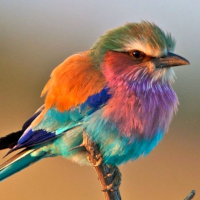

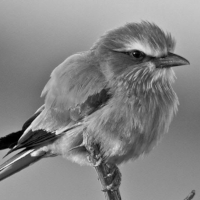

In [37]:
import imageio
from IPython.display import Image
from IPython.display import display

im = imageio.imread('numpy_img/birdo.png')
coeff = np.array([0.299, 0.587, 0.114])

sums = np.dot(im,coeff)
sums = np.round(sums).astype(np.uint8)
im = np.repeat(sums, coeff.size).reshape(im.shape)

imageio.imwrite('numpy_img/birdo_g.png', im)

x = Image('numpy_img/birdo.png')
y = Image('numpy_img/birdo_g.png')
display(x,y)

## 8. Транспонирование матриц

__Напоминание теории.__ __Транспонированной матрицей__ $A^{T}$ называется матрица, полученная из исходной матрицы $A$ заменой строк на столбцы. Формально: элементы матрицы $A^{T}$ определяются как $a^{T}_{ij} = a_{ji}$, где $a^{T}_{ij}$ — элемент матрицы $A^{T}$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` транспонированная матрица вычисляется с помощью функции __`numpy.transpose()`__ или с помощью _метода_ __`array.T`__, где __`array`__ — нужный двумерный массив.


In [38]:
a = np.array([[1, 2], [3, 4]])
b = np.transpose(a)
c = a.T

In [39]:
print ("Матрица:\n", a)
print ("Транспонирование функцией:\n", b)
print ("Транспонирование методом:\n",  c)

Матрица:
 [[1 2]
 [3 4]]
Транспонирование функцией:
 [[1 3]
 [2 4]]
Транспонирование методом:
 [[1 3]
 [2 4]]


См. более подробно о 
[numpy.transpose()](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.transpose.html) и 
[array.T](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.T.html) в `NumPy`.

В следующих разделах активно используется модуль __`numpy.linalg`__, реализующий некоторые приложения линейной алгебры. Более подробно о функциях, описанных ниже, и различных других функциях этого модуля можно посмотреть в его [документации](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.linalg.html#linear-algebra-numpy-linalg).

## 9. Определитель матрицы

__Напоминание теории.__ Для квадратных матриц существует понятие __определителя__.

Пусть $A$ — квадратная матрица. __Определителем__ (или __детерминантом__) матрицы $A \in \mathbb{R}^{n \times n}$ назовем число 

$$\det A = \sum_{\alpha_{1}, \alpha_{2}, \dots, \alpha_{n}} (-1)^{N(\alpha_{1}, \alpha_{2}, \dots, \alpha_{n})} \cdot a_{\alpha_{1} 1} \cdot \cdot \cdot a_{\alpha_{n} n},
$$
где $\alpha_{1}, \alpha_{2}, \dots, \alpha_{n}$ — перестановка чисел от $1$ до $n$, $N(\alpha_{1}, \alpha_{2}, \dots, \alpha_{n})$ — число инверсий в перестановке, суммирование ведется по всем возможным перестановкам длины $n$.

_Не стоит расстраиваться, если это определение понятно не до конца — в дальнейшем в таком виде оно не понадобится._

Например, для матрицы размера $2 \times 2$ получается:

$$\det \left( \begin{array}{cc} a_{11} & a_{12} \\ a_{21} & a_{22}  \end{array} \right) = a_{11} a_{22} - a_{12} a_{21}
$$


Вычисление определителя матрицы по определению требует порядка $n!$ операций, поэтому разработаны методы, которые позволяют вычислять его быстро и эффективно.

В `NumPy` определитель матрицы вычисляется с помощью функции __`numpy.linalg.det(a)`__, где __`a`__ — исходная матрица.

In [40]:
a = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(a)

In [41]:
print ("Матрица:\n", a)
print ("Определитель:\n", det)

Матрица:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
Определитель:
 -1.0


Рассмотрим одно интересное свойство определителя. Пусть у нас есть параллелограмм с углами в точках $(0, 0), (c,d), (a+c, b+d), (a, b)$ (углы даны в порядке обхода по часовой стрелке). Тогда площадь этого параллелограмма можно вычислить как модуль определителя матрицы $\left( \begin{array}{cc} a & c \\ b & d  \end{array} \right)$. Похожим образом можно выразить и объем параллелепипеда через определитель матрицы размера $3 \times 3$.

## 10. Ранг матрицы

__Напоминание теории.__ __Рангом матрицы__ $A$ называется максимальное число линейно независимых строк (столбцов) этой матрицы.

В `NumPy` ранг матрицы вычисляется с помощью функции __`numpy.linalg.matrix_rank(M, tol=None)`__, где __`M`__ — матрица, __`tol`__ — параметр, отвечающий за некоторую точность вычисления. В простом случае можно его не задавать, и функция сама определит подходящее значение этого параметра.

In [42]:
a = np.array([[1, 2, 3], [1, 1, 1], [2, 2, 2]])
r = np.linalg.matrix_rank(a)

In [43]:
print ("Матрица:\n", a)
print ("Ранг матрицы:", r)

Матрица:
 [[1 2 3]
 [1 1 1]
 [2 2 2]]
Ранг матрицы: 2


С помощью вычисления ранга матрицы можно проверять линейную независимость системы векторов.

Допустим, у нас есть несколько векторов. Составим из них матрицу, где наши векторы будут являться строками. Понятно, что векторы линейно независимы тогда и только тогда, когда ранг полученной матрицы совпадает с числом векторов. Приведем пример:

In [44]:
a = np.array([1, 2, 3])
b = np.array([1, 1, 1])
c = np.array([2, 3, 5])
m = np.array([a, b, c])

In [45]:
print (np.linalg.matrix_rank(m) == m.shape[0])

True


## 11. Системы линейных уравнений

__Напоминание теории.__ __Системой линейных алгебраических уравнений__ называется система вида $Ax = b$, где $A \in \mathbb{R}^{n \times m}, x \in \mathbb{R}^{m \times 1}, b \in \mathbb{R}^{n \times 1}$. В случае квадратной невырожденной матрицы $A$ решение системы единственно.

В `NumPy` решение такой системы можно найти с помощью функции __`numpy.linalg.solve(a, b)`__, где первый аргумент — матрица $A$, второй — столбец $b$.

In [46]:
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)

In [47]:
print ("Матрица A:\n", a)
print ("Вектор b:\n", b)
print ("Решение системы:\n", x)

Матрица A:
 [[3 1]
 [1 2]]
Вектор b:
 [9 8]
Решение системы:
 [2. 3.]


Убедимся, что вектор __x__ действительно является решением системы:

In [48]:
print (a.dot(x))

[9. 8.]


Бывают случаи, когда решение системы не существует. Но хотелось бы все равно "решить" такую систему. Логичным кажется искать такой вектор $x$, который минимизирует выражение $\left\Vert Ax - b\right\Vert^{2}$ — так мы приблизим выражение $Ax$ к $b$.

В `NumPy` такое псевдорешение можно искать с помощью функции __`numpy.linalg.lstsq(a, b, ...)`__, где первые два аргумента такие же, как и для функции __`numpy.linalg.solve()`__. 
Помимо решения функция возвращает еще три значения, которые нам сейчас не понадобятся.

In [49]:
a = np.array([[0, 1], [1, 1], [2, 1], [3, 1]])
b = np.array([-1, 0.2, 0.9, 2.1])
x, res, r, s = np.linalg.lstsq(a, b, rcond=None)

In [50]:
print ("Матрица A:\n", a)
print ("Вектор b:\n", b)
print ("Псевдорешение системы:\n", x)

Матрица A:
 [[0 1]
 [1 1]
 [2 1]
 [3 1]]
Вектор b:
 [-1.   0.2  0.9  2.1]
Псевдорешение системы:
 [ 1.   -0.95]


## 12. Обращение матриц

__Напоминание теории.__  Для квадратных невырожденных матриц определено понятие __обратной__ матрицы. 

Пусть $A$ — квадратная невырожденная матрица. Матрица $A^{-1}$ называется __обратной матрицей__ к $A$, если 

$$AA^{-1} = A^{-1}A = I,
$$ 

где $I$ — единичная матрица.

В `NumPy` обратные матрицы вычисляются с помощью функции __`numpy.linalg.inv(a)`__, где __`a`__ — исходная матрица.

In [51]:
a = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
b = np.linalg.inv(a)

In [52]:
print ("Матрица A:\n", a)
print ("Обратная матрица к A:\n", b)
print ("Произведение A на обратную должна быть единичной:\n", a.dot(b))

Матрица A:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
Обратная матрица к A:
 [[ 6.  9. -7.]
 [-2. -4.  3.]
 [-1. -1.  1.]]
Произведение A на обратную должна быть единичной:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 13. Собственные числа и собственные вектора матрицы

__Напоминание теории.__ Для квадратных матриц определены понятия __собственного вектора__ и __собственного числа__.

Пусть $A$ — квадратная матрица и $A \in \mathbb{R}^{n \times n}$. __Собственным вектором__ матрицы $A$ называется такой ненулевой вектор $x \in \mathbb{R}^{n}$, что для некоторого $\lambda \in \mathbb{R}$ выполняется равенство $Ax = \lambda x$. При этом $\lambda$ называется __собственным числом__ матрицы $A$. Собственные числа и собственные векторы матрицы играют важную роль в теории линейной алгебры и ее практических приложениях.

В `NumPy` собственные числа и собственные векторы матрицы вычисляются с помощью функции __`numpy.linalg.eig(a)`__, где __`a`__ — исходная матрица. В качестве результата эта функция выдает одномерный массив __`w`__ собственных чисел и двумерный массив __`v`__, в котором по столбцам записаны собственные вектора, так что вектор __`v[:, i]`__ соотвествует собственному числу __`w[i]`__.

In [53]:
a = np.array([[-1, -6], [2, 6]])
w, v = np.linalg.eig(a)

In [54]:
print ("Матрица A:\n", a)
print ("Собственные числа:\n", w)
print ("Собственные векторы:\n", v)

Матрица A:
 [[-1 -6]
 [ 2  6]]
Собственные числа:
 [2. 3.]
Собственные векторы:
 [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]


__Обратите внимание:__ у вещественной матрицы собственные значения или собственные векторы могут быть комплексными.

## 14. Расстояния между векторами

Вспомним некоторые нормы, которые можно ввести в пространстве $\mathbb{R}^{n}$, и рассмотрим, с помощью каких библиотек и функций их можно вычислять в `NumPy`.

### p-норма

p-норма (норма Гёльдера) для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
\left\Vert x \right\Vert_{p} = \left( \sum_{i=1}^n \left| x_{i} \right|^{p} \right)^{1 / p},~p \geq 1.
$$

В частных случаях при:
* $p = 1$ получаем $\ell_{1}$ норму
* $p = 2$ получаем $\ell_{2}$ норму

Далее нам понабится модуль `numpy.linalg`, реализующий некоторые приложения линейной алгебры. Для вычисления различных норм мы используем функцию __`numpy.linalg.norm(x, ord=None, ...)`__, где __`x`__ — исходный вектор, __`ord`__ — параметр, определяющий норму (мы рассмотрим два варианта его значений — 1 и 2). Импортируем эту функцию:

In [55]:
from numpy.linalg import norm

### $\ell_{1}$ норма

$\ell_{1}$ норма 
(также известная как [манхэттенское расстояние](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2))
для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
 \left\Vert x \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} \right|.
$$

Ей в функции __`numpy.linalg.norm(x, ord=None, ...)`__ соответствует параметр __`ord=1`__.

In [56]:
a = np.array([1, 2, -3])
print('Вектор a:', a)

Вектор a: [ 1  2 -3]


In [57]:
print('L1 норма вектора a:\n', norm(a, ord=1))

L1 норма вектора a:
 6.0


### $\ell_{2}$ норма

$\ell_{2}$ норма (также известная как евклидова норма)
для вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ вычисляется по формуле:

$$
 \left\Vert x \right\Vert_{2} = \sqrt{\sum_{i=1}^n \left( x_{i} \right)^2}.
$$

Ей в функции __`numpy.linalg.norm(x, ord=None, ...)`__ соответствует параметр __`ord=2`__.

In [58]:
print ('L2 норма вектора a:\n', norm(a, ord=2))

L2 норма вектора a:
 3.7416573867739413


Более подробно о том, какие еще нормы (в том числе матричные) можно вычислить, см. [документацию](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html). 

## 15. Расстояния между векторами

Для двух векторов $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ и $y = (y_{1}, \dots, y_{n}) \in \mathbb{R}^{n}$ $\ell_{1}$ и $\ell_{2}$ раccтояния вычисляются по следующим формулам соответственно:

$$
 \rho_{1}\left( x, y \right) = \left\Vert x - y \right\Vert_{1} = \sum_{i=1}^n \left| x_{i} - y_{i} \right|
$$

$$
 \rho_{2}\left( x, y \right) = \left\Vert x - y \right\Vert_{2} = 
 \sqrt{\sum_{i=1}^n \left( x_{i} - y_{i} \right)^2}.
$$

In [59]:
a = np.array([1, 2, -3])
b = np.array([-4, 3, 8])
print ('Вектор a:', a)
print ('Вектор b:', b)

Вектор a: [ 1  2 -3]
Вектор b: [-4  3  8]


In [60]:
print ('L1 расстояние между векторами a и b:\n', norm(a - b, ord=1))
print ('L2 расстояние между векторами a и b:\n', norm(a - b, ord=2))

L1 расстояние между векторами a и b:
 17.0
L2 расстояние между векторами a и b:
 12.12435565298214


## 16. Скалярное произведение и угол между векторами

In [61]:
a = np.array([0, 5, -1])
b = np.array([-4, 9, 3])
print ('Вектор a:', a)
print ('Вектор b:', b)

Вектор a: [ 0  5 -1]
Вектор b: [-4  9  3]


Скалярное произведение в пространстве $\mathbb{R}^{n}$ для двух векторов $x = (x_{1}, \dots, x_{n})$ и $y = (y_{1}, \dots, y_{n})$ определяется как:

$$
\langle x, y \rangle = \sum_{i=1}^n x_{i} y_{i}.
$$

Длиной вектора $x = (x_{1}, \dots, x_{n}) \in \mathbb{R}^{n}$ называется квадратный корень из скалярного произведения, то есть длина равна евклидовой норме вектора:

$$
\left| x \right| = \sqrt{\langle x, x \rangle} = \sqrt{\sum_{i=1}^n x_{i}^2} =  \left\Vert x \right\Vert_{2}.
$$

Теперь, когда мы знаем расстояние между двумя ненулевыми векторами и их длины, мы можем вычислить угол между ними через скалярное произведение:

$$
\langle x, y \rangle = \left| x \right| | y | \cos(\alpha)
\implies \cos(\alpha) = \frac{\langle x, y \rangle}{\left| x \right| | y |},
$$

где $\alpha \in [0, \pi]$ — угол между векторами $x$ и $y$.

In [62]:
cos_angle = np.dot(a, b) / norm(a) / norm(b)
print ('Косинус угла между a и b:', cos_angle)
print ('Сам угол:', np.arccos(cos_angle))

Косинус угла между a и b: 0.8000362836474323
Сам угол: 0.6434406336093618


## 17. Комплексные числа в питоне

__Напоминание теории.__ __Комплексными числами__ называются числа вида $x + iy$, где $x$ и $y$ — вещественные числа, а $i$ — мнимая единица (величина, для которой выполняется равенство $i^{2} = -1$). Множество всех комплексных чисел обозначается буквой $\mathbb{C}$ (подробнее про комплексные числа см. [википедию](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BA%D1%81%D0%BD%D0%BE%D0%B5_%D1%87%D0%B8%D1%81%D0%BB%D0%BE)).

В питоне комплескные числа можно задать следующим образом (__j__ обозначает мнимую единицу):

In [63]:
a = 3 + 2j
b = 1j

In [64]:
print ("Комплексное число a:\n", a)
print ("Комплексное число b:\n", b)

Комплексное число a:
 (3+2j)
Комплексное число b:
 1j


С комплексными числами в питоне можно производить базовые арифметические операции так же, как и с вещественными числами:

In [65]:
c = a * a
d = a / (4 - 5j)

In [66]:
print ("Комплексное число c:\n", c)
print ("Комплексное число d:\n", d)

Комплексное число c:
 (5+12j)
Комплексное число d:
 (0.0487804878048781+0.5609756097560976j)


# Задания: (Блок 2)
### Задание 3:
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

![func.png](func.png "func.png")

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. Мы хотим приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени $n$ (то есть $w_0$ + $w_1 x$ + $w_2 x^2$ + $\ldots$ + $w_n x^n$) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0$, ... $w_n$ можно определить из следующей системы линейных уравнений:

![eqs.png](eqs.png "eqs.png")

где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)



In [49]:
# Задание 3. Пункт 1
from scipy import linalg

A1 = np.array([[1, 1], [1, 15]])
b1 = np.array([3.252, 0.635])
x1 = scipy.linalg.solve(A1, b1)
print(x1)

[ 3.43892857 -0.18692857]


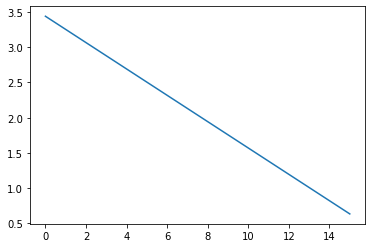

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

c1 = np.arange(0., 15.1, 0.1)
y1 = x1[0] + x1[1] * c1
plt.plot(c1, y1)

In [53]:
# Задание 3. Пункт 2
from scipy import linalg

A2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 255]])
b2 = np.array([3.252, 2.316, 0.635])
x2 = scipy.linalg.solve(A2, b2)
print(x2)

[ 3.33915179 -0.08133147 -0.00582031]


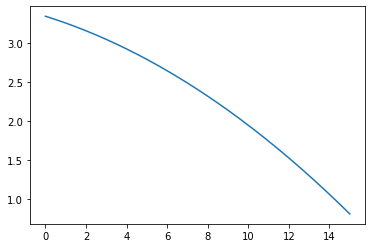

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

c2 = np.arange(0., 15.1, 0.1)
y2 = x2[0] + x2[1] * c2 + x2[2] * c2 * c2
plt.plot(c2, y2)

In [55]:
# Задание 3. Пункт 3
from scipy import linalg

A3 = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 255, 3375]])
b3 = np.array([3.252, 1.746, 2.505, 0.635])
x3 = scipy.linalg.solve(A3, b3)
print(x3)

[ 5.088125   -2.27513542  0.46538021 -0.02636979]


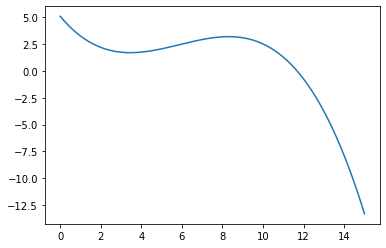

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

c3 = np.arange(0., 15.1, 0.1)
y3 = x3[0] + x3[1] * c3 + x3[2] * c3 * c3 + x3[3] * c3 * c3 * c3
plt.plot(c3, y3)